# Shapeの整形

## 市区町村リストの取得

In [57]:
import json
import pandas as pd

with open('../cityList.json', 'r', encoding='utf-8') as file:
    cities = json.load(file)

df_cities = pd.DataFrame(cities)
df_cities

,prefCode,cityCode,cityName,bigCityFlag,prefName
0,01000,01100,札幌市,2,北海道
1,01000,01101,札幌市中央区,1,北海道
2,01000,01102,札幌市北区,1,北海道
3,01000,01103,札幌市東区,1,北海道
4,01000,01104,札幌市白石区,1,北海道
...,...,...,...,...,...
1917,47000,47361,久米島町,0,沖縄県
1918,47000,47362,八重瀬町,0,沖縄県
1919,47000,47375,多良間村,0,沖縄県
1920,47000,47381,竹富町,0,沖縄県


## shapeに市区町村データを追加

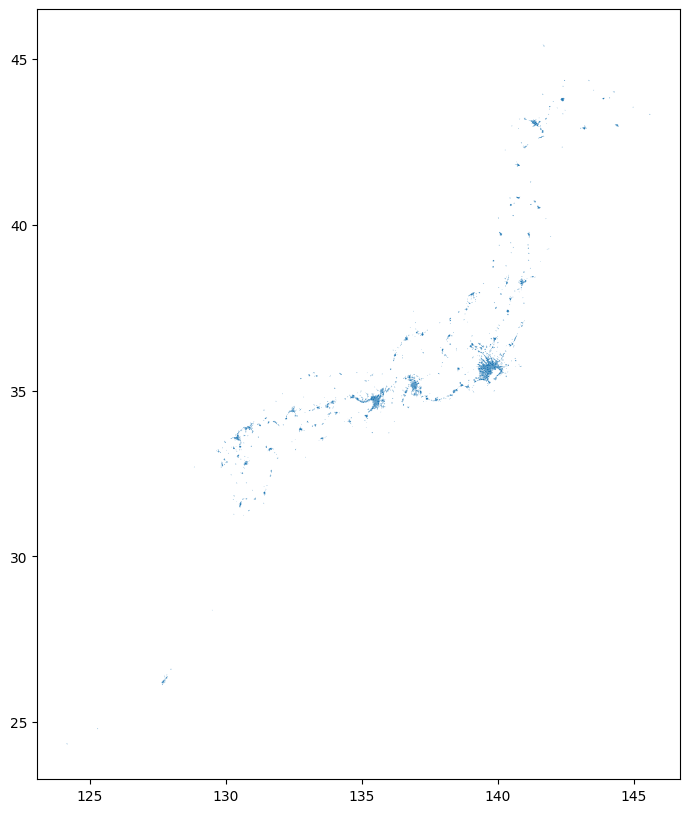

,cityCode
0,37201
1,40221
2,28382
3,27206
4,43104
...,...
1458,01202
1459,12219
1460,12219
1461,28201


In [60]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# shapeファイルのパスを指定
shapefile_path = './shape/A16-20_00_DID.shp'

# 表示する属性情報の列名を指定
columns_to_keep=['A16_002']

# GeoDataFrameを表示
gdf = gpd.read_file(shapefile_path)

columns_to_keep = columns_to_keep + ['geometry']
gdf = gdf[columns_to_keep]
gdf = gdf.rename(columns={'A16_002': 'cityCode'})

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax)
plt.show()

# 属性情報をDataFrameとして取得
attr_df = pd.DataFrame(gdf.drop(columns='geometry'))
display(attr_df)

In [61]:
# gdfとdf_citiesをマージ
gdf = gdf.merge(df_cities, on='cityCode', how='left')

attr_df = pd.DataFrame(gdf.drop(columns='geometry'))
display(attr_df)

,cityCode,prefCode,cityName,bigCityFlag,prefName
0,37201,37000,高松市,0,香川県
1,40221,40000,太宰府市,0,福岡県
2,28382,28000,播磨町,0,兵庫県
3,27206,27000,泉大津市,0,大阪府
4,43104,43000,熊本市南区,1,熊本県
...,...,...,...,...,...
1458,01202,01000,函館市,0,北海道
1459,12219,12000,市原市,0,千葉県
1460,12219,12000,市原市,0,千葉県
1461,28201,28000,姫路市,0,兵庫県


# GeoJsonに変換して保存

In [72]:
import os

# GeoJSONファイルを保存するディレクトリを作成
output_dir = './geojson'
os.makedirs(output_dir, exist_ok=True)

# prefCodeの一覧を取得
pref_codes = gdf['prefCode'].unique()

for pref_code in pref_codes:
    # prefCodeでフィルタリング
    gdf_filtered = gdf[gdf['prefCode'] == pref_code]
    
    # ファイル名の生成（prefCodeを使用）
    filename = f"{pref_code}.geojson"
    output_path = os.path.join(output_dir, filename)
    
    # GeoJSONとして保存
    gdf_filtered.to_file(output_path, driver='GeoJSON')
    print(f"{filename} を保存しました。")


37000.geojson を保存しました。
40000.geojson を保存しました。
28000.geojson を保存しました。
27000.geojson を保存しました。
43000.geojson を保存しました。
12000.geojson を保存しました。
41000.geojson を保存しました。
34000.geojson を保存しました。
11000.geojson を保存しました。
09000.geojson を保存しました。
23000.geojson を保存しました。
14000.geojson を保存しました。
35000.geojson を保存しました。
01000.geojson を保存しました。
19000.geojson を保存しました。
08000.geojson を保存しました。
13000.geojson を保存しました。
22000.geojson を保存しました。
26000.geojson を保存しました。
29000.geojson を保存しました。
05000.geojson を保存しました。
33000.geojson を保存しました。
06000.geojson を保存しました。
15000.geojson を保存しました。
24000.geojson を保存しました。
31000.geojson を保存しました。
32000.geojson を保存しました。
03000.geojson を保存しました。
47000.geojson を保存しました。
38000.geojson を保存しました。
18000.geojson を保存しました。
16000.geojson を保存しました。
07000.geojson を保存しました。
02000.geojson を保存しました。
04000.geojson を保存しました。
25000.geojson を保存しました。
17000.geojson を保存しました。
46000.geojson を保存しました。
42000.geojson を保存しました。
45000.geojson を保存しました。
20000.geojson を保存しました。
10000.geojson を保存しました。
21000.geojson を保存しました。
44000.geojs

# TopoJsonに変換して保存

In [73]:

import subprocess

for pref_code in pref_codes:

    input_geojson = f"./geojson/{pref_code}.geojson"
    output_topojson = f"./topojson/{pref_code}.topojson"

    # mapshaper-npmを使用してGeoJSONをTopoJSONに変換
    command = f"mapshaper {input_geojson} -o format=topojson {output_topojson}"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)


